In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data
Data = pd.read_csv("BMI_Dataset_train.csv")
Test = pd.read_csv("BMI_Dataset_test.csv")

# Slicing
X = Data.iloc[:,1:3]
Y = Data.iloc[:,3:]
X_test= Test.iloc[:,1:3]

# Organize the data
m = len(X)
ID= Test.iloc[:,0:1]
X = X.to_numpy()
Y = Y.to_numpy()
X_test = X_test.to_numpy()

# Print
Data.info()
# print(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Height(meter)  1000 non-null   float64
 2   Weight(KG)     1000 non-null   float64
 3   BMI            1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [3]:
print(X.shape)
print(Y.shape)
print(m)

(1000, 2)
(1000, 1)
1000


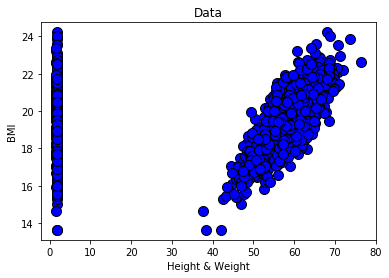

In [4]:
# Plotting the data
plt.figure()
plt.plot(X, Y, 'bo', ms=10, mec='k')
plt.title("Data")
plt.xlabel('Height & Weight')
plt.ylabel('BMI')
plt.grid(False)

In [5]:
#Standardization
X = (X-X.mean())/(X.std())
X_test = (X_test-X_test.mean())/(X_test.std())

# Normalization
# X=(X-X.min())/(X.max()-X.min())
# X=(X_test-X_test.min())/(X_test.max()-X_test.min())

# Add the one's columns
x = np.hstack([np.ones(Y.shape) , X])
x_test = np.hstack([np.ones(ID.shape) , X_test])

print(x)
print(x_test)
print(x.shape)
print(x_test.shape)

[[ 1.         -0.99306591  0.75896685]
 [ 1.         -0.98792011  1.13555102]
 [ 1.         -0.98982016  1.40065443]
 ...
 [ 1.         -0.98923419  1.10635047]
 [ 1.         -0.99169984  0.90371457]
 [ 1.         -0.99251396  1.00512629]]
[[ 1.         -0.9903895   1.04415234]
 [ 1.         -0.99130648  1.06151658]
 [ 1.         -0.99565158  0.69060329]
 ...
 [ 1.         -0.99104434  0.96132706]
 [ 1.         -0.99132624  1.03610597]
 [ 1.         -0.9914664   0.92593073]]
(1000, 3)
(1000, 3)


In [6]:
def hypothesis(x,theta):
    return (np.dot(x,theta.T))
#   hypothesis = matrix(1000,3) * matrix(3,1) = matrix(1000,1)

In [7]:
def cost_function(x,theta,y):
    h = hypothesis(x,theta)
    j = (1/(2*m))*np.sum(np.square(h-y))
#   J = NUM * np.sum(np.square(( matrix(1000,1) - matrix(1000,1) ))) = matrix(1000,1)
    return j

In [8]:
def grdient_decsend(iterations,alpha,x,y):
#     theta=np.random.rand(1,x.shape[1])
#     theta=np.full((1,x.shape[1]),0.5)
    theta=np.zeros((1,x.shape[1]))
    cost_history=[]
    for i in range(iterations):
        h = hypothesis(x,theta)
        theta = theta - ((alpha/m)*( ((h-y).T).dot(x) ))
#       matrix(1,3) =  matrix(1,3) - matrix(1,1000) * matrix(1000,3)
        cost_history.append(cost_function(x,theta,y))
    return theta,cost_history

In [9]:
# Run Linear Regression
theta,cost_history=grdient_decsend(2000,0.67,x,Y)
print("Theta:",theta)
print("Cost Functhion:",cost_function(x,theta,Y))

Theta: [[ 5.50521295 -7.35888598  6.60850013]]
Cost Functhion: 0.4504214508223145


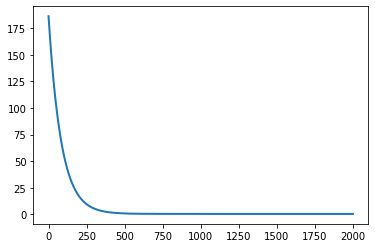

In [10]:
# Plotting Cost Function
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)

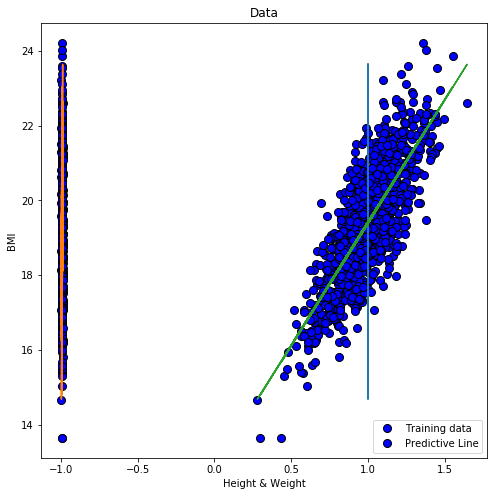

In [11]:
# Plotting the data with predictive line 
plt.figure(figsize=(8,8))
plt.plot(X, Y, 'bo', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Height & Weight')
plt.ylabel('BMI')
plt.grid(False)
h = hypothesis(x, theta)
plt.plot(x, h,'-')
plt.legend(['Training data', 'Predictive Line']);

In [12]:
# Predictive the test data
y_final = hypothesis(x_test,theta)
y_final.shape

(1000, 1)

In [13]:
# Creating the csv file 
submission = np.concatenate([ ID , y_final ], axis=1)
submission = pd.DataFrame(submission)
submission.to_csv("SubmissionN.csv",header =['ID','BMI'],index=False)

In [14]:
# Editting
r = pd.read_csv('submission.csv')
r['ID'] = r['ID'].astype(int)
r.to_csv("Submission.csv",header = ['ID','BMI'],index=False)
r = pd.read_csv('submission.csv')
r

FileNotFoundError: [Errno 2] File submission.csv does not exist: 'submission.csv'